In [1]:
# https://www.kaggle.com/shayanfazeli/heartbeat   # data set 

# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # plotting
import os
import sklearn
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sn


Using TensorFlow backend.


In [5]:
# reading csv file  

test=pd.read_csv("mitbih_test.csv",header=None) 
train=pd.read_csv("mitbih_train.csv",header=None) 
#Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
# N- normal, S-supraventricular, V-ventricular, F-fusion, Q- unknown

In [6]:
print("Type\tCount")
print((train[187]).value_counts())

Type	Count
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


In [7]:
print("train shape : ",train.shape)
print("test shape : ",test.shape)


train shape :  (87554, 188)
test shape :  (21892, 188)


In [8]:
label_train=[]                              # making multiclass to binary class now labels_train containing either 0 or 1 
for i in train.iloc[:,187] :
  if i not in  [0.0]:
    label_train.append(1)
    #print("value is",i)
  else:
    label_train.append(0)
    #print("value",i)
    

In [9]:
label_test=[]                              # making multiclass to binary class.now labels_test containing either 0 or 1 
for i in test.iloc[:,187]:
  if i not in  [0.0]:
    label_test.append(1)
    #print("value is",i)
  else:
    label_test.append(0)
    #print("value",i)


In [10]:
#create new df 
labels_train = pd.DataFrame({'col':label_train})
#print (labels_train)

labels_test = pd.DataFrame({'col':label_test})
#print (labels_test)


In [11]:
label_train=np.asarray(label_train)

label_test=np.asarray(label_test)

In [12]:
train[187] = labels_train    # replace labels column with binary labels
test[187] =  labels_test

In [13]:
print('Count of all classes in trainining dataset')
print("Type\tCount")
print((train[187]).value_counts())

print('*************************************')

print('Count of all classes in trainining dataset')
print("Type\tCount")
print((test[187]).value_counts())

Count of all classes in trainining dataset
Type	Count
0    72471
1    15083
Name: 187, dtype: int64
*************************************
Count of all classes in trainining dataset
Type	Count
0    18118
1     3774
Name: 187, dtype: int64


In [14]:
print("train shape : ",train.shape)
print("test shape : ",test.shape)

feature_train=train.iloc[:,0:187] 
print("feature_train shape : ",feature_train.shape)

labels_train=train.iloc[:,187] 
print("labels_train shape : ",labels_train.shape)

feature_test=test.iloc[:,0:187] 
print("feature_test shape : ",feature_test.shape)

labels_test=test.iloc[:,187] 
print("labels_test shape : ",labels_test.shape)
      


train shape :  (87554, 188)
test shape :  (21892, 188)
feature_train shape :  (87554, 187)
labels_train shape :  (87554,)
feature_test shape :  (21892, 187)
labels_test shape :  (21892,)


In [15]:
from sklearn.preprocessing import StandardScaler
standardized_training_data=StandardScaler().fit_transform(feature_train)
feature_train=standardized_training_data

standardized_test_data=StandardScaler().fit_transform(feature_test)
feature_test=standardized_test_data

In [16]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [17]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [18]:
# here we are having a class number for each image
print("Class label of first image :", label_train[83456])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

#Y_train = np_utils.to_categorical(label_train, 2) 
#Y_test = np_utils.to_categorical(label_test, 2)

Y_train = np_utils.to_categorical(label_train)
print("After converting the output into a vector : ",Y_train[83456])

Y_test = np_utils.to_categorical(label_test)

Class label of first image : 1
After converting the output into a vector :  [0. 1.]


In [19]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 

output_dim = 2
input_dim = feature_train.shape[1]

#batch_size = 128 
#nb_epoch = 20

batch_size = 512
nb_epoch = 100

In [20]:
print("feature_train",feature_train.shape)
print("Y_train",Y_train)
print("feature_test",feature_test.shape)
print("Y_test",Y_test.shape)

feature_train (87554, 187)
Y_train [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
feature_test (21892, 187)
Y_test (21892, 2)


In [21]:
# 1. Softmax classifier



# start building a model
model = Sequential()


model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(feature_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(feature_test, Y_test)) 



Train on 87554 samples, validate on 21892 samples
Epoch 1/100
87554/87554 [==============================] - 1s 9us/step - loss: 0.5602 - accuracy: 0.7532 - val_loss: 0.5929 - val_accuracy: 0.6969
Epoch 2/100
87554/87554 [==============================] - 1s 8us/step - loss: 0.3811 - accuracy: 0.8691 - val_loss: 0.3467 - val_accuracy: 0.8827
Epoch 3/100
87554/87554 [==============================] - 1s 8us/step - loss: 0.3294 - accuracy: 0.8884 - val_loss: 0.3205 - val_accuracy: 0.8932
Epoch 4/100
87554/87554 [==============================] - 1s 8us/step - loss: 0.3100 - accuracy: 0.8957 - val_loss: 0.3069 - val_accuracy: 0.8976
Epoch 5/100
87554/87554 [==============================] - 1s 8us/step - loss: 0.2998 - accuracy: 0.8973 - val_loss: 0.2991 - val_accuracy: 0.8992
Epoch 6/100
87554/87554 [==============================] - 1s 8us/step - loss: 0.2941 - accuracy: 0.8993 - val_loss: 0.2942 - val_accuracy: 0.9004
Epoch 7/100
87554/87554 [==============================] - 1s 8us/s

In [22]:
y_pred = model.predict(feature_test, batch_size=512)


print(y_pred)
print('******************************')
print("prob of getting 0 and 1 class of first data",y_pred[0])   #prob of getting 0 and 1 class of first data
print("prob of getting 0 and 1 class of last data",y_pred[21891])    #prob of getting 0 and 1 class of last data
print("it return the index with max prob. 0 index is for 0th class & 1 index for 1st class",y_pred.argmax(axis=1))  # it return the index with max prob. 0 index is for 0th class & 1 index for 1st class

print('******************************')
print("label index of actual test set",Y_test)
print("it return the index with max value. 0 index is for 0th class & 1 index for 1st class",Y_test.argmax(axis=1))   # it return the index with max value. 0 index is for 0th class & 1 index for 1st class

print('******************************')

print(classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1)))

#Precision=TP/(TP+FP)
#Recall=TP/(TP+FN)
#F1 Score=(2*Recall*Precision)/(Recall+Precision)
#Accuracy=(TP+TN)/(TP+TN+FN+FP)
#Accuracy_Score_svm=accuracy_score(y_test,y_pred_svm)
#print('Average Accuracy:%0.2f +/- (%0.1f) %%' % (Accuracy_Score_svm.mean()*100, Accuracy_Score_svm.std()*100))


[[0.92360884 0.07639121]
 [0.9043323  0.09566768]
 [0.81859595 0.181404  ]
 ...
 [0.8422713  0.1577287 ]
 [0.0227447  0.9772553 ]
 [0.09094535 0.90905464]]
******************************
prob of getting 0 and 1 class of first data [0.92360884 0.07639121]
prob of getting 0 and 1 class of last data [0.09094535 0.90905464]
it return the index with max prob. 0 index is for 0th class & 1 index for 1st class [0 0 0 ... 0 1 1]
******************************
label index of actual test set [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
it return the index with max value. 0 index is for 0th class & 1 index for 1st class [0 0 0 ... 1 1 1]
******************************
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     18118
           1       0.85      0.54      0.66      3774

    accuracy                           0.90     21892
   macro avg       0.88      0.76      0.80     21892
weighted avg       0.90      0.90      0.90     

Test score: 0.27609041410522317
Test accuracy: 0.904714047908783


<IPython.core.display.Javascript object>


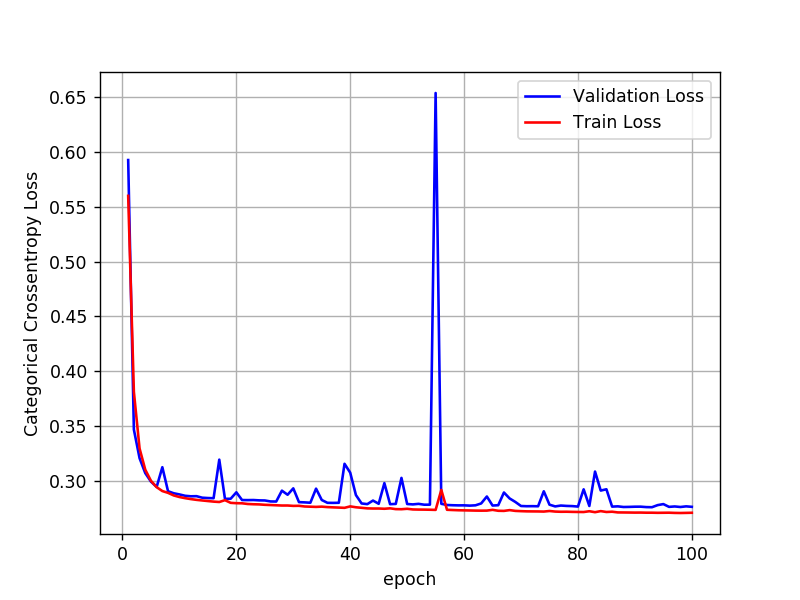

In [23]:
score = model.evaluate(feature_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [24]:
# 2. MLP + Sigmoid activation + SGDOptimizer

# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(128, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(64, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               24064     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 130       
Total params: 32,450
Trainable params: 32,450
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(feature_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(feature_test, Y_test))

Train on 87554 samples, validate on 21892 samples
Epoch 1/100
87554/87554 [==============================] - 1s 12us/step - loss: 0.4702 - accuracy: 0.8202 - val_loss: 0.4483 - val_accuracy: 0.8276
Epoch 2/100
87554/87554 [==============================] - 1s 10us/step - loss: 0.4378 - accuracy: 0.8277 - val_loss: 0.4311 - val_accuracy: 0.8276
Epoch 3/100
87554/87554 [==============================] - 1s 10us/step - loss: 0.4212 - accuracy: 0.8277 - val_loss: 0.4155 - val_accuracy: 0.8276
Epoch 4/100
87554/87554 [==============================] - 1s 10us/step - loss: 0.4074 - accuracy: 0.8277 - val_loss: 0.4034 - val_accuracy: 0.8276
Epoch 5/100
87554/87554 [==============================] - 1s 10us/step - loss: 0.3961 - accuracy: 0.8277 - val_loss: 0.4001 - val_accuracy: 0.8411
Epoch 6/100
87554/87554 [==============================] - 1s 10us/step - loss: 0.3869 - accuracy: 0.8305 - val_loss: 0.3838 - val_accuracy: 0.8326
Epoch 7/100
87554/87554 [==============================] - 1s 

Epoch 56/100
87554/87554 [==============================] - 1s 11us/step - loss: 0.2473 - accuracy: 0.9195 - val_loss: 0.2507 - val_accuracy: 0.9189
Epoch 57/100
87554/87554 [==============================] - 1s 11us/step - loss: 0.2467 - accuracy: 0.9200 - val_loss: 0.2519 - val_accuracy: 0.9190
Epoch 58/100
87554/87554 [==============================] - 1s 11us/step - loss: 0.2461 - accuracy: 0.9203 - val_loss: 0.2495 - val_accuracy: 0.9195
Epoch 59/100
87554/87554 [==============================] - 1s 12us/step - loss: 0.2454 - accuracy: 0.9205 - val_loss: 0.2512 - val_accuracy: 0.9193
Epoch 60/100
87554/87554 [==============================] - 1s 11us/step - loss: 0.2450 - accuracy: 0.9207 - val_loss: 0.2484 - val_accuracy: 0.9206
Epoch 61/100
87554/87554 [==============================] - 1s 11us/step - loss: 0.2442 - accuracy: 0.9212 - val_loss: 0.2479 - val_accuracy: 0.9210
Epoch 62/100
87554/87554 [==============================] - 1s 11us/step - loss: 0.2436 - accuracy: 0.9213

In [26]:
y_pred = model_sigmoid.predict(feature_test, batch_size=512)
print(classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.93      0.99      0.96     18118
           1       0.92      0.64      0.75      3774

    accuracy                           0.93     21892
   macro avg       0.93      0.81      0.86     21892
weighted avg       0.93      0.93      0.92     21892



Test score: 0.22630892279878648
Test accuracy: 0.9279188513755798


<IPython.core.display.Javascript object>


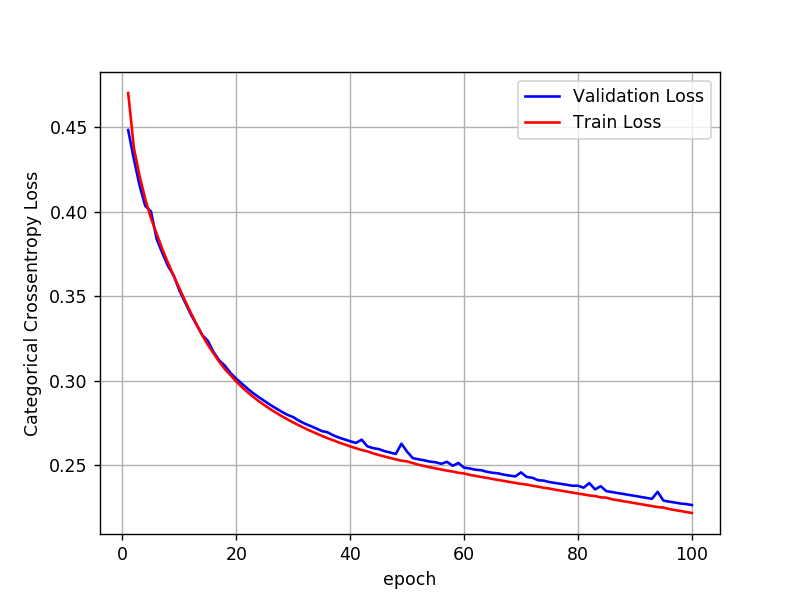

In [27]:
score = model_sigmoid.evaluate(feature_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [28]:
# 3. MLP + Sigmoid activation + ADAM


model_sigmoid_ADAM = Sequential()
model_sigmoid_ADAM.add(Dense(128, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid_ADAM.add(Dense(64, activation='sigmoid'))
model_sigmoid_ADAM.add(Dense(output_dim, activation='softmax'))

model_sigmoid_ADAM.summary()

model_sigmoid_ADAM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid_ADAM.fit(feature_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(feature_test, Y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               24064     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 130       
Total params: 32,450
Trainable params: 32,450
Non-trainable params: 0
_________________________________________________________________
Train on 87554 samples, validate on 21892 samples
Epoch 1/100
87554/87554 [==============================] - 1s 14us/step - loss: 0.2992 - accuracy: 0.8926 - val_loss: 0.2384 - val_accuracy: 0.9214
Epoch 2/100
87554/87554 [==============================] - 1s 11us/step - loss: 0.2095 - accuracy: 0.9302 - val_loss: 0.1919 - val_accuracy: 0.9357
Epoch 3/100
87554/87554 [=========

In [29]:
y_pred = model_sigmoid_ADAM.predict(feature_test, batch_size=512)
print(classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18118
           1       0.97      0.91      0.94      3774

    accuracy                           0.98     21892
   macro avg       0.98      0.95      0.96     21892
weighted avg       0.98      0.98      0.98     21892



Test score: 0.1122793380220301
Test accuracy: 0.9798099994659424


<IPython.core.display.Javascript object>


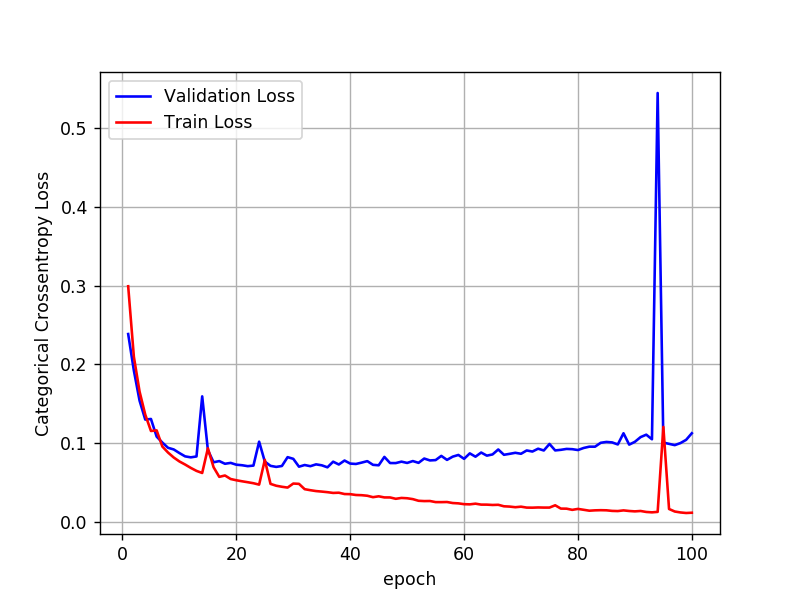

In [30]:
score = model_sigmoid_ADAM.evaluate(feature_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [31]:
# 4. MLP + ReLU +SGD

# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(128, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               24064     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 130       
Total params: 32,450
Trainable params: 32,450
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(feature_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(feature_test, Y_test))

Train on 87554 samples, validate on 21892 samples
Epoch 1/100
87554/87554 [==============================] - 1s 13us/step - loss: 0.3823 - accuracy: 0.8561 - val_loss: 0.2940 - val_accuracy: 0.9056
Epoch 2/100
87554/87554 [==============================] - 1s 11us/step - loss: 0.2616 - accuracy: 0.9135 - val_loss: 0.2480 - val_accuracy: 0.9181
Epoch 3/100
87554/87554 [==============================] - 1s 12us/step - loss: 0.2295 - accuracy: 0.9231 - val_loss: 0.2236 - val_accuracy: 0.9253
Epoch 4/100
87554/87554 [==============================] - 1s 12us/step - loss: 0.2104 - accuracy: 0.9291 - val_loss: 0.2067 - val_accuracy: 0.9316
Epoch 5/100
87554/87554 [==============================] - 1s 11us/step - loss: 0.1963 - accuracy: 0.9351 - val_loss: 0.1943 - val_accuracy: 0.9364
Epoch 6/100
87554/87554 [==============================] - 1s 11us/step - loss: 0.1855 - accuracy: 0.9402 - val_loss: 0.1851 - val_accuracy: 0.9403
Epoch 7/100
87554/87554 [==============================] - 1s 

Epoch 56/100
87554/87554 [==============================] - 1s 11us/step - loss: 0.0870 - accuracy: 0.9728 - val_loss: 0.0993 - val_accuracy: 0.9695
Epoch 57/100
87554/87554 [==============================] - 1s 11us/step - loss: 0.0864 - accuracy: 0.9729 - val_loss: 0.0992 - val_accuracy: 0.9697
Epoch 58/100
87554/87554 [==============================] - 1s 11us/step - loss: 0.0858 - accuracy: 0.9733 - val_loss: 0.0981 - val_accuracy: 0.9695
Epoch 59/100
87554/87554 [==============================] - 1s 11us/step - loss: 0.0853 - accuracy: 0.9734 - val_loss: 0.0981 - val_accuracy: 0.9695
Epoch 60/100
87554/87554 [==============================] - 1s 11us/step - loss: 0.0847 - accuracy: 0.9735 - val_loss: 0.0977 - val_accuracy: 0.9699
Epoch 61/100
87554/87554 [==============================] - 1s 11us/step - loss: 0.0841 - accuracy: 0.9737 - val_loss: 0.0969 - val_accuracy: 0.9698
Epoch 62/100
87554/87554 [==============================] - 1s 12us/step - loss: 0.0835 - accuracy: 0.9737

In [33]:
y_pred = model_relu.predict(feature_test, batch_size=512)
print(classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.98      0.94      0.96     18118
           1       0.76      0.91      0.83      3774

    accuracy                           0.93     21892
   macro avg       0.87      0.93      0.89     21892
weighted avg       0.94      0.93      0.94     21892



Test score: 0.18460234004385442
Test accuracy: 0.934359610080719


<IPython.core.display.Javascript object>


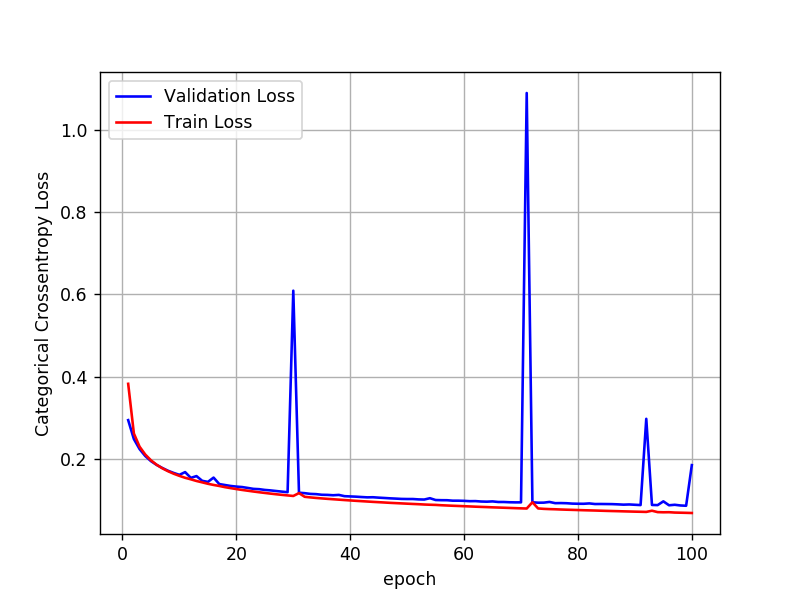

In [34]:
score = model_relu.evaluate(feature_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [35]:
# 5. MLP + ReLU + ADAM

model_relu_ADAM = Sequential()
model_relu_ADAM.add(Dense(128, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu_ADAM.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu_ADAM.add(Dense(output_dim, activation='softmax'))

print(model_relu_ADAM.summary())

model_relu_ADAM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_ADAM.fit(feature_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(feature_test, Y_test))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               24064     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 130       
Total params: 32,450
Trainable params: 32,450
Non-trainable params: 0
_________________________________________________________________
None
Train on 87554 samples, validate on 21892 samples
Epoch 1/100
87554/87554 [==============================] - 1s 16us/step - loss: 0.1895 - accuracy: 0.9363 - val_loss: 0.1319 - val_accuracy: 0.9581
Epoch 2/100
87554/87554 [==============================] - 1s 13us/step - loss: 0.1102 - accuracy: 0.9655 - val_loss: 0.1080 - val_accuracy: 0.9652
Epoch 3/100
87554/87554 [====

In [36]:
y_pred = model_relu_ADAM.predict(feature_test, batch_size=512)
print(classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18118
           1       0.95      0.94      0.95      3774

    accuracy                           0.98     21892
   macro avg       0.97      0.97      0.97     21892
weighted avg       0.98      0.98      0.98     21892



Test score: 0.11471050967551087
Test accuracy: 0.9816371202468872


<IPython.core.display.Javascript object>


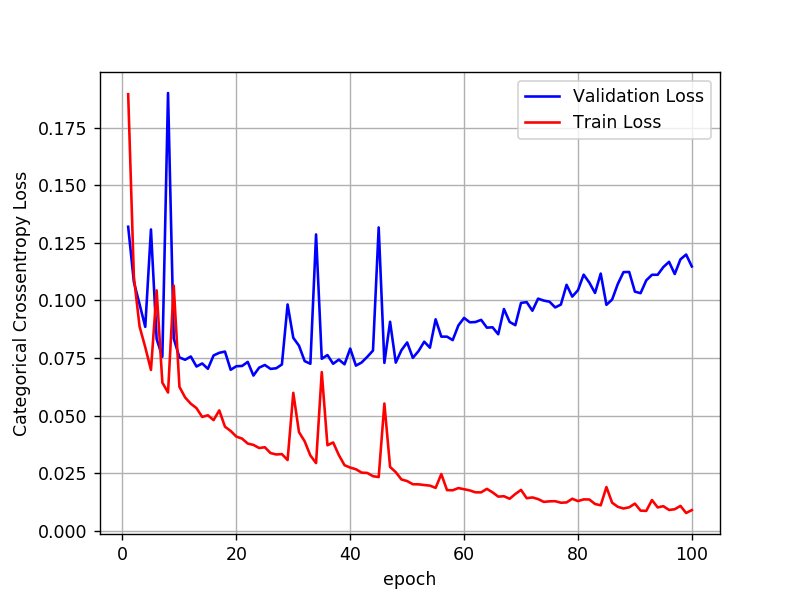

In [37]:
score = model_relu_ADAM.evaluate(feature_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [38]:
# 6. MLP + Batch-Norm on hidden Layers + AdamOptimizer

# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(128, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               24064     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 130       
Total params: 33,218
Trainable params: 32,834
Non-trainable params: 384
_________________________________________________________________


In [39]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(feature_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(feature_test, Y_test))

Train on 87554 samples, validate on 21892 samples
Epoch 1/100
87554/87554 [==============================] - 2s 24us/step - loss: 0.2985 - accuracy: 0.9008 - val_loss: 0.2443 - val_accuracy: 0.9232
Epoch 2/100
87554/87554 [==============================] - 1s 16us/step - loss: 0.1301 - accuracy: 0.9599 - val_loss: 0.1391 - val_accuracy: 0.9536
Epoch 3/100
87554/87554 [==============================] - 1s 16us/step - loss: 0.1127 - accuracy: 0.9649 - val_loss: 0.1092 - val_accuracy: 0.9658
Epoch 4/100
87554/87554 [==============================] - 1s 16us/step - loss: 0.1025 - accuracy: 0.9671 - val_loss: 0.1008 - val_accuracy: 0.9682
Epoch 5/100
87554/87554 [==============================] - 1s 15us/step - loss: 0.0923 - accuracy: 0.9712 - val_loss: 0.0947 - val_accuracy: 0.9705
Epoch 6/100
87554/87554 [==============================] - 2s 24us/step - loss: 0.0873 - accuracy: 0.9732 - val_loss: 0.0961 - val_accuracy: 0.9702
Epoch 7/100
87554/87554 [==============================] - 2s 

Epoch 56/100
87554/87554 [==============================] - 1s 16us/step - loss: 0.0552 - accuracy: 0.9820 - val_loss: 0.0767 - val_accuracy: 0.9783
Epoch 57/100
87554/87554 [==============================] - 1s 15us/step - loss: 0.0446 - accuracy: 0.9857 - val_loss: 0.0746 - val_accuracy: 0.9790
Epoch 58/100
87554/87554 [==============================] - 1s 15us/step - loss: 0.0424 - accuracy: 0.9864 - val_loss: 0.0797 - val_accuracy: 0.9774
Epoch 59/100
87554/87554 [==============================] - 1s 16us/step - loss: 0.0581 - accuracy: 0.9807 - val_loss: 0.0831 - val_accuracy: 0.9762
Epoch 60/100
87554/87554 [==============================] - 1s 16us/step - loss: 0.0474 - accuracy: 0.9846 - val_loss: 0.0776 - val_accuracy: 0.9777
Epoch 61/100
87554/87554 [==============================] - 1s 15us/step - loss: 0.0592 - accuracy: 0.9797 - val_loss: 0.0756 - val_accuracy: 0.9773
Epoch 62/100
87554/87554 [==============================] - 1s 16us/step - loss: 0.0444 - accuracy: 0.9854

In [40]:
y_pred = model_batch.predict(feature_test, batch_size=512)
print(classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18118
           1       0.96      0.92      0.94      3774

    accuracy                           0.98     21892
   macro avg       0.97      0.95      0.96     21892
weighted avg       0.98      0.98      0.98     21892



Test score: 0.07837338759088247
Test accuracy: 0.9796729683876038


<IPython.core.display.Javascript object>


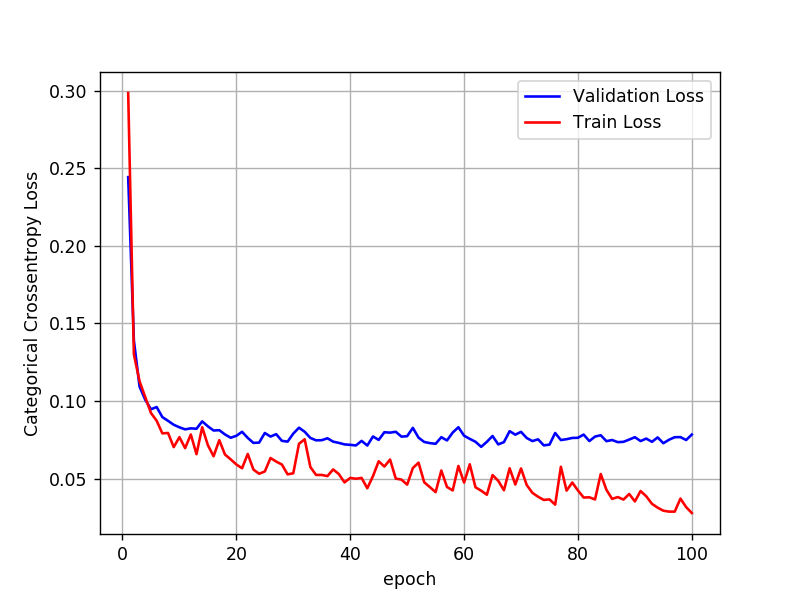

In [41]:
score = model_batch.evaluate(feature_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [42]:
# 7. MLP + Dropout + AdamOptimizer

# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(128, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.3))

model_drop.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.3))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 128)               24064     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 2)                

In [43]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(feature_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(feature_test, Y_test))

Train on 87554 samples, validate on 21892 samples
Epoch 1/100
87554/87554 [==============================] - 2s 27us/step - loss: 0.4397 - accuracy: 0.8108 - val_loss: 0.2607 - val_accuracy: 0.9207
Epoch 2/100
87554/87554 [==============================] - 2s 18us/step - loss: 0.2441 - accuracy: 0.9150 - val_loss: 0.1758 - val_accuracy: 0.9419
Epoch 3/100
87554/87554 [==============================] - 2s 18us/step - loss: 0.2144 - accuracy: 0.9262 - val_loss: 0.1611 - val_accuracy: 0.9461
Epoch 4/100
87554/87554 [==============================] - 2s 18us/step - loss: 0.2065 - accuracy: 0.9288 - val_loss: 0.1555 - val_accuracy: 0.9475
Epoch 5/100
87554/87554 [==============================] - 2s 19us/step - loss: 0.1960 - accuracy: 0.9334 - val_loss: 0.1496 - val_accuracy: 0.9500
Epoch 6/100
87554/87554 [==============================] - 2s 19us/step - loss: 0.1848 - accuracy: 0.9373 - val_loss: 0.1468 - val_accuracy: 0.9506
Epoch 7/100
87554/87554 [==============================] - 2s 

Epoch 56/100
87554/87554 [==============================] - 2s 18us/step - loss: 0.1074 - accuracy: 0.9655 - val_loss: 0.0812 - val_accuracy: 0.9747
Epoch 57/100
87554/87554 [==============================] - 2s 18us/step - loss: 0.1037 - accuracy: 0.9669 - val_loss: 0.0809 - val_accuracy: 0.9745
Epoch 58/100
87554/87554 [==============================] - 2s 18us/step - loss: 0.1018 - accuracy: 0.9673 - val_loss: 0.0805 - val_accuracy: 0.9743
Epoch 59/100
87554/87554 [==============================] - 2s 18us/step - loss: 0.1006 - accuracy: 0.9680 - val_loss: 0.0779 - val_accuracy: 0.9747
Epoch 60/100
87554/87554 [==============================] - 2s 18us/step - loss: 0.1001 - accuracy: 0.9675 - val_loss: 0.0783 - val_accuracy: 0.9759
Epoch 61/100
87554/87554 [==============================] - 2s 18us/step - loss: 0.1025 - accuracy: 0.9670 - val_loss: 0.0784 - val_accuracy: 0.9757
Epoch 62/100
87554/87554 [==============================] - 2s 18us/step - loss: 0.1003 - accuracy: 0.9676

In [44]:
y_pred = model_drop.predict(feature_test, batch_size=512)
print(classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18118
           1       0.97      0.90      0.93      3774

    accuracy                           0.98     21892
   macro avg       0.98      0.94      0.96     21892
weighted avg       0.98      0.98      0.98     21892



Test score: 0.07174886159463374
Test accuracy: 0.9774803519248962


<IPython.core.display.Javascript object>


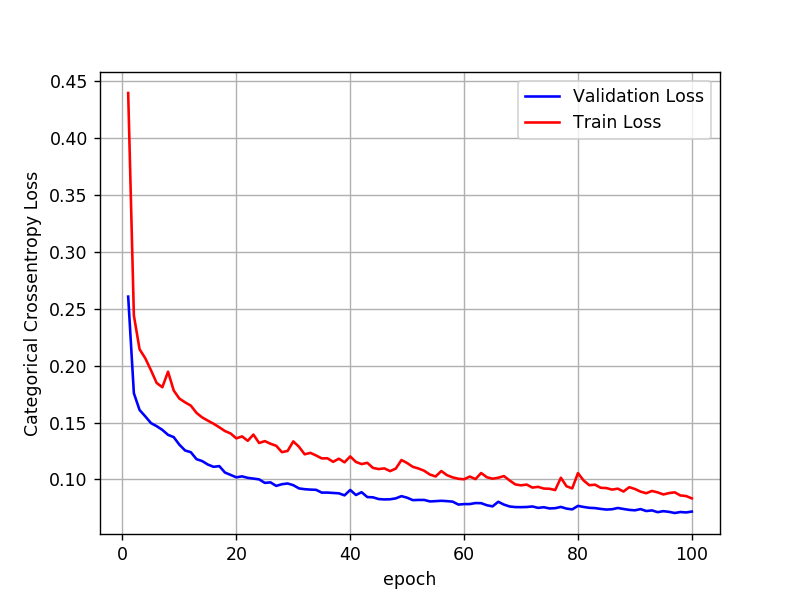

In [45]:
score = model_drop.evaluate(feature_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [46]:
# 8. MLP + ReLU + ADAM + batchNormalization+ Dropout

model_relu_ADAM_BN_drop = Sequential()

model_relu_ADAM_BN_drop.add(Dense(128, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu_ADAM_BN_drop.add(BatchNormalization())
model_relu_ADAM_BN_drop.add(Dropout(0.3))

model_relu_ADAM_BN_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu_ADAM_BN_drop.add(BatchNormalization())
model_relu_ADAM_BN_drop.add(Dropout(0.3))

model_relu_ADAM_BN_drop.add(Dense(output_dim, activation='softmax'))

print(model_relu_ADAM_BN_drop.summary())

model_relu_ADAM_BN_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_ADAM_BN_drop.fit(feature_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(feature_test, Y_test))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               24064     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_6 (Batch (None, 64)                256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 2)                

87554/87554 [==============================] - 2s 19us/step - loss: 0.0774 - accuracy: 0.9751 - val_loss: 0.0732 - val_accuracy: 0.9773
Epoch 48/100
87554/87554 [==============================] - 2s 20us/step - loss: 0.0800 - accuracy: 0.9741 - val_loss: 0.0678 - val_accuracy: 0.9798
Epoch 49/100
87554/87554 [==============================] - ETA: 0s - loss: 0.0750 - accuracy: 0.97 - 2s 21us/step - loss: 0.0751 - accuracy: 0.9760 - val_loss: 0.0685 - val_accuracy: 0.9791
Epoch 50/100
87554/87554 [==============================] - 2s 20us/step - loss: 0.0744 - accuracy: 0.9756 - val_loss: 0.0671 - val_accuracy: 0.9800
Epoch 51/100
87554/87554 [==============================] - 2s 19us/step - loss: 0.0747 - accuracy: 0.9758 - val_loss: 0.0690 - val_accuracy: 0.9800
Epoch 52/100
87554/87554 [==============================] - 2s 19us/step - loss: 0.0736 - accuracy: 0.9760 - val_loss: 0.0672 - val_accuracy: 0.9795
Epoch 53/100
87554/87554 [==============================] - 2s 18us/step - lo

In [47]:
y_pred = model_relu_ADAM_BN_drop.predict(feature_test, batch_size=512)
print(classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18118
           1       0.98      0.92      0.95      3774

    accuracy                           0.98     21892
   macro avg       0.98      0.96      0.97     21892
weighted avg       0.98      0.98      0.98     21892



Test score: 0.0601732198818227
Test accuracy: 0.9825963973999023


<IPython.core.display.Javascript object>


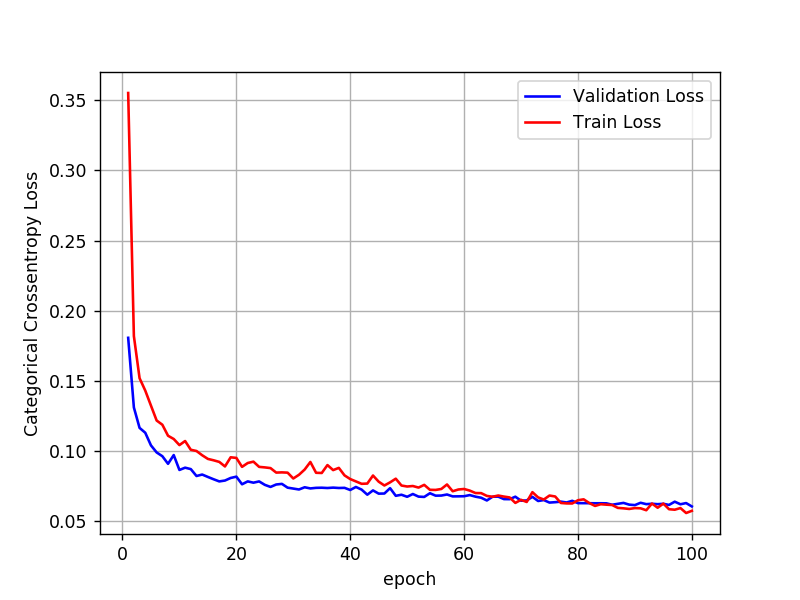

In [48]:
score = model_relu_ADAM_BN_drop.evaluate(feature_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)